Compare the SURF and HOG feature descriptors by extracting 
features from the same image. Visualize and discuss the differences 
in keypoints and feature representation.

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize detectors
try:
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=100)
except:
    print("SURF not available - using ORB instead")
    surf = cv2.ORB_create()  # Alternative feature detector

hog = cv2.HOGDescriptor()

# Feature Extraction
if 'surf' in locals():
    kp, des = surf.detectAndCompute(gray, None)
    surf_img = cv2.drawKeypoints(img, kp, None, (0,255,0), 
                               flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
else:
    kp = surf.detect(gray, None)
    surf_img = cv2.drawKeypoints(img, kp, None, (0,255,0))

# HOG Feature Visualization
hog_img = img.copy()
cell_size = (8, 8)
for y in range(0, img.shape[0], cell_size[1]):
    for x in range(0, img.shape[1], cell_size[0]):
        cv2.rectangle(hog_img, (x,y), (x+cell_size[0], y+cell_size[1]), (0,255,0), 1)

# Display results
cv2.imshow('SURF/ORB Features', surf_img)
cv2.imshow('HOG Grid Cells', hog_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

SURF not available - using ORB instead


Using ORB


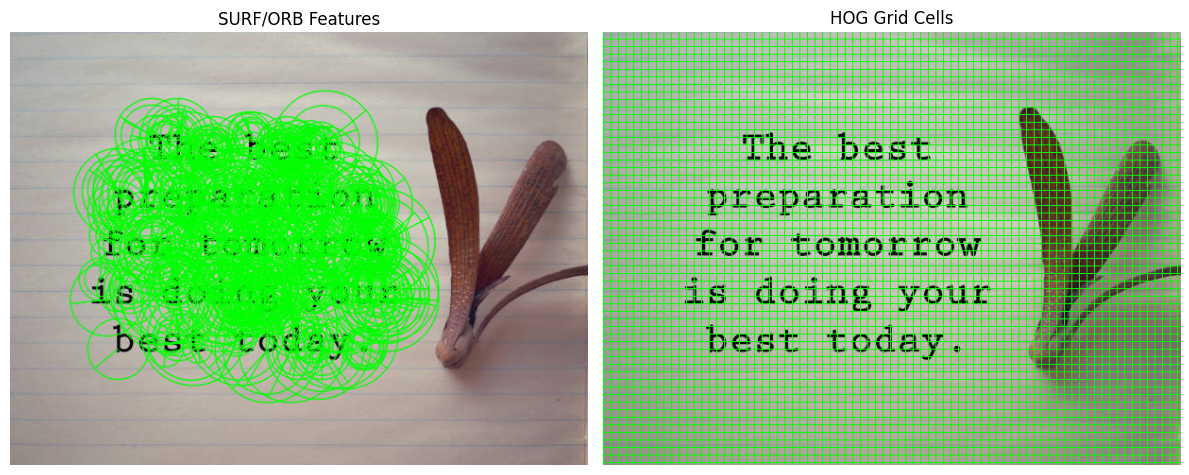

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Feature detector (SURF if available, fallback to ORB)
try:
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=100)
    kp, des = surf.detectAndCompute(gray, None)
    print("Using SURF")
except:
    surf = cv2.ORB_create()
    kp, des = surf.detectAndCompute(gray, None)
    print("Using ORB")

# Draw keypoints
feat_img = cv2.drawKeypoints(img, kp, None, (0, 255, 0),
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# HOG grid visualization (simple cell layout)
hog_img = img.copy()
cell_size = (8, 8)
for y in range(0, hog_img.shape[0], cell_size[1]):
    for x in range(0, hog_img.shape[1], cell_size[0]):
        cv2.rectangle(hog_img, (x, y), (x + cell_size[0], y + cell_size[1]), (0, 255, 0), 1)

# Convert for matplotlib display
feat_img_rgb = cv2.cvtColor(feat_img, cv2.COLOR_BGR2RGB)
hog_img_rgb = cv2.cvtColor(hog_img, cv2.COLOR_BGR2RGB)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(feat_img_rgb)
axs[0].set_title('SURF/ORB Features')
axs[0].axis('off')

axs[1].imshow(hog_img_rgb)
axs[1].set_title('HOG Grid Cells')
axs[1].axis('off')

plt.tight_layout()
plt.show()
